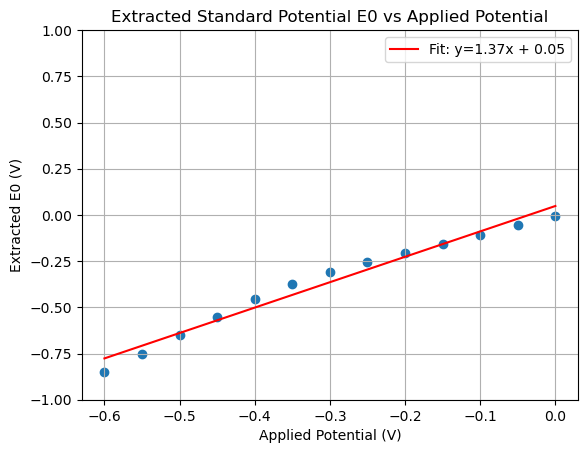

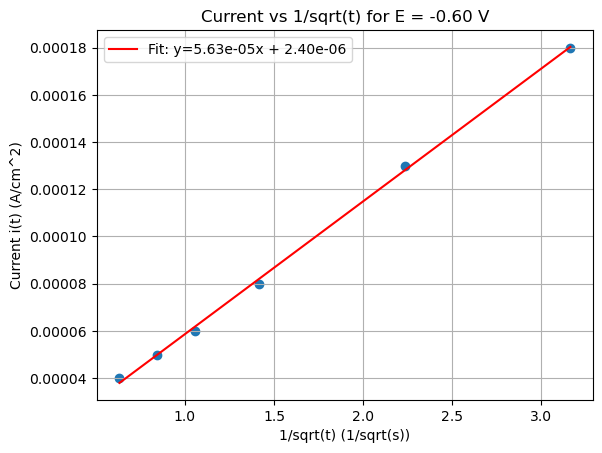

Diffusion constant D: 1.19e-07 cm^2/s
18.750392375972453


In [11]:
# put data into lists; for each row of applied potential, we have current at different times
'''
\begin{center}
\begin{tabular}{|l|l|l|l|l|l|l|}
\hline
Current in $\mu \mathrm{A} / \mathrm{cm}^{2}$ & \multicolumn{6}{|c|}{Time elapsed after step, s} \\
\hline
Applied Potential, V & 0.1 & 0.2 & 0.5 & 0.9 & 1.4 & 2.5 \\
\hline
-0.60 & 0.18 & 0.13 & 0.08 & 0.06 & 0.05 & 0.04 \\
\hline
-0.55 & 1.3 & 0.84 & 0.53 & 0.41 & 0.32 & 0.26 \\
\hline
-0.50 & 8.5 & 6.2 & 4.0 & 2.9 & 2.4 & 1.8 \\
\hline
-0.45 & 57.6 & 42.2 & 26.9 & 19.3 & 15.4 & 11.8 \\
\hline
-0.40 & 324 & 233 & 143 & 106 & 88 & 64 \\
\hline
-0.35 & 958 & 651 & 422 & 312 & 260 & 179 \\
\hline
-0.30 & 1307 & 874 & 565 & 435 & 339 & 254 \\
\hline
-0.25 & 1358 & 1009 & 596 & 453 & 355 & 275 \\
\hline
-0.20 & 1369 & 951 & 588 & 461 & 377 & 275 \\
\hline
-0.15 & 1394 & 980 & 602 & 459 & 367 & 276 \\
\hline
-0.10 & 1375 & 969 & 618 & 452 & 353 & 271 \\
\hline
-0.05 & 1376 & 979 & 623 & 446 & 368 & 260 \\
\hline
0.00 & 1345 & 946 & 606 & 460 & 359 & 280 \\
\hline
\end{tabular}
\end{center}
'''
import numpy as np
import matplotlib.pyplot as plt


data_dict = {
    '-0.60': [0.18, 0.13, 0.08, 0.06, 0.05, 0.04],
    '-0.55': [1.3, 0.84, 0.53, 0.41, 0.32, 0.26],
    '-0.50': [8.5, 6.2, 4.0, 2.9, 2.4, 1.8],
    '-0.45': [57.6, 42.2, 26.9, 19.3, 15.4, 11.8],
    '-0.40': [324, 233, 143, 106, 88, 64],
    '-0.35': [958, 651, 422, 312, 260, 179],
    '-0.30': [1307, 874, 565, 435, 339, 254],
    '-0.25': [1358, 1009, 596, 453, 355, 275],
    '-0.20': [1369, 951, 588, 461, 377, 275],
    '-0.15': [1394, 980, 602, 459, 367, 276],
    '-0.10': [1375, 969, 618, 452, 353, 271],
    '-0.05': [1376, 979, 623, 446, 368, 260],
    '0.00': [1345, 946, 606, 460, 359, 280],
}

# Convert to numpy arrays
voltages = np.array([float(v) for v in data_dict.keys()])
currents_array = np.array([data_dict[v] for v in data_dict.keys()])  # Shape: (13, 6)
times = np.array([0.1, 0.2, 0.5, 0.9, 1.4, 2.5])  # Time points in seconds

R = 8.314  # J/(mol K)
T = 298  # K
n = 1  # number of electrons transferred
F = 96485  # C/mol
t = 0.1  # seconds
C = 1

# Now you can plot using the arrays
plt.figure()
currents_1d = currents_array[:,0]
# plot E &= E^{0} + \frac{RT}{nF} \ln \left( \frac{C}{i(t) \sqrt{t}} - 1 \right) to back out E^0
E0_values = voltages - (R * T) / (n * F) * np.log(C / (currents_1d * 1e-3 * np.sqrt(t)) - 1)
# do a scatter plot
plt.scatter(voltages, E0_values)
plt.xlabel('Applied Potential (V)')
plt.ylabel('Extracted E0 (V)')
plt.ylim(-1,1)
# add a line of best fit
m1, b1 = np.polyfit(voltages, E0_values, 1)
plt.plot(voltages, m1 * voltages + b1, color='red', label=f'Fit: y={m1:.2f}x + {b1:.2f}')
plt.legend()
plt.title('Extracted Standard Potential E0 vs Applied Potential')
plt.grid()
plt.show()

currents_1e = currents_array[0,:]
plt.figure()
# scatter plot i(t) vs 1/sqrt(t)
plt.scatter(1/np.sqrt(times), currents_1e * 1e-3)  # convert to A/cm^2
plt.xlabel('1/sqrt(t) (1/sqrt(s))')
plt.ylabel('Current i(t) (A/cm^2)')
plt.title('Current vs 1/sqrt(t) for E = -0.60 V')
plt.grid()
# add a 1/sqrt(t) fit line
m2, b2 = np.polyfit(1/np.sqrt(times), currents_1e * 1e-3, 1)
plt.plot(1/np.sqrt(times), m2 * (1/np.sqrt(times)) + b2, color='red', label=f'Fit: y={m2:.2e}x + {b2:.2e}')
plt.legend()
plt.show()

    #m\equiv C' &= \frac{\sqrt{D} F c_{O}^{*}}{(1 + k) \sqrt{\pi}}; back out D
c_O_star = 3e-6  # mol/cm^3
# \exp \left( \frac{nF}{RT} (E - E^{0}) \right) \equiv k(E)
k = np.exp((n * F) / (R * T) * (voltages[0] - b1))  # using first voltage and extracted E0
D = ((m2 * (1 + k) * np.sqrt(np.pi)) / (F * c_O_star))**2  # cm^2/s
print(f'Diffusion constant D: {D:.2e} cm^2/s')
print(m2/c_O_star)


